<a href="https://colab.research.google.com/github/AHMADSYED4312/HnCC_Project/blob/main/Medico_The_Perfect_Solution_for_predecting_Heart_Disease_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Machine learning dataset/heart disease classification dataset.csv")
df.shape #(rows, columns)

(303, 15)

In [ ]:
df.head()

,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0,63,male,3,145.0,233.0,1,0,150.0,0,2.3,0,0,1,yes
1,1,37,male,2,130.0,250.0,0,1,187.0,0,3.5,0,0,2,yes
2,2,41,female,1,130.0,204.0,0,0,172.0,0,1.4,2,0,2,yes
3,3,56,male,1,120.0,236.0,0,1,178.0,0,0.8,2,0,2,yes
4,4,57,female,0,NaN,354.0,0,1,163.0,1,0.6,2,0,2,yes


In [ ]:
df.tail()

,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,298,57,female,0,140.0,241.0,0,1,123.0,1,0.2,1,0,3,no
299,299,45,male,3,110.0,264.0,0,1,132.0,0,1.2,1,0,3,no
300,300,68,male,0,144.0,193.0,1,1,141.0,0,3.4,1,2,3,no
301,301,57,male,0,NaN,131.0,0,1,115.0,1,1.2,1,1,3,no
302,302,57,female,1,130.0,236.0,0,0,174.0,0,0.0,1,1,2,no


In [ ]:
df["target"].value_counts()

yes    165
no     138
Name: target, dtype: int64

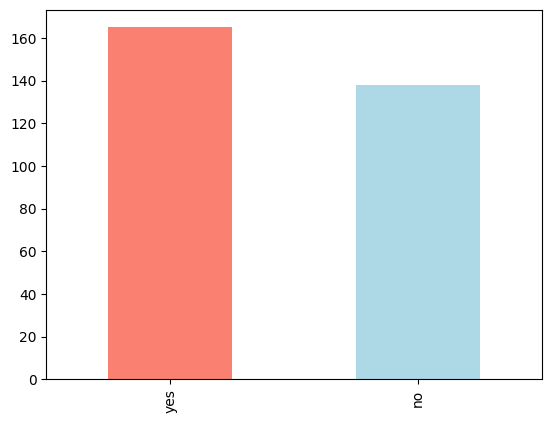

In [ ]:
df["target"].value_counts().plot(kind="bar", color=["salmon", "lightblue"]);

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  303 non-null    int64  
 1   age         303 non-null    int64  
 2   sex         303 non-null    object 
 3   cp          303 non-null    int64  
 4   trestbps    299 non-null    float64
 5   chol        302 non-null    float64
 6   fbs         303 non-null    int64  
 7   restecg     303 non-null    int64  
 8   thalach     298 non-null    float64
 9   exang       303 non-null    int64  
 10  oldpeak     303 non-null    float64
 11  slope       303 non-null    int64  
 12  ca          303 non-null    int64  
 13  thal        303 non-null    int64  
 14  target      303 non-null    object 
dtypes: float64(4), int64(9), object(2)
memory usage: 35.6+ KB


In [ ]:
# Are there any missing values
df.isna().sum()

Unnamed: 0    0
age           0
sex           0
cp            0
trestbps      4
chol          1
fbs           0
restecg       0
thalach       5
exang         0
oldpeak       0
slope         0
ca            0
thal          0
target        0
dtype: int64

In [ ]:
df.dropna(axis = 0, inplace = True)

In [ ]:
df.isna().sum()

Unnamed: 0    0
age           0
sex           0
cp            0
trestbps      0
chol          0
fbs           0
restecg       0
thalach       0
exang         0
oldpeak       0
slope         0
ca            0
thal          0
target        0
dtype: int64

In [ ]:
df.describe()

,Unnamed: 0,age,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
count,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000
mean,150.877133,54.348123,0.965870,131.679181,246.177474,0.146758,0.518771,149.880546,0.331058,1.054266,1.392491,0.730375,2.320819
std,86.860137,9.182042,1.033114,17.658077,51.405545,0.354470,0.527162,22.638525,0.471399,1.173169,0.618946,1.029862,0.613331
min,0.000000,29.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,76.000000,47.000000,0.000000,120.000000,211.000000,0.000000,0.000000,134.000000,0.000000,0.000000,1.000000,0.000000,2.000000
50%,151.000000,55.000000,1.000000,130.000000,240.000000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000
75%,226.000000,61.000000,2.000000,140.000000,275.000000,0.000000,1.000000,167.000000,1.000000,1.800000,2.000000,1.000000,3.000000
max,302.000000,77.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000


In [ ]:
df.sex.value_counts()

male      202
female     91
Name: sex, dtype: int64

In [ ]:
pd.crosstab(df.target, df.sex)

sex,female,male
target,,
no,23,110
yes,68,92


In [ ]:
import matplotlib.pyplot as plt

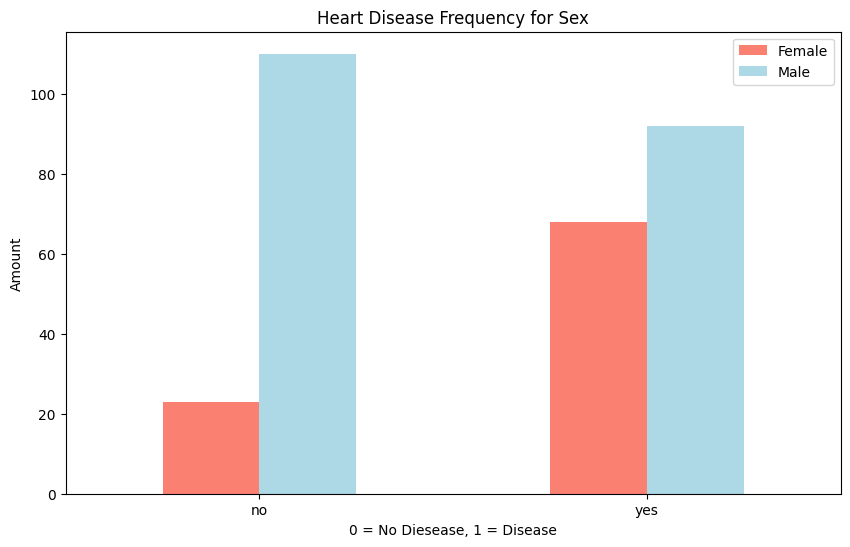

In [ ]:
pd.crosstab(df.target, df.sex).plot(kind="bar",
                                    figsize =(10,6),
                                    color = ["Salmon", "lightblue"])
plt.title("Heart Disease Frequency for Sex")
plt.xlabel("0 = No Diesease, 1 = Disease")
plt.ylabel("Amount")
plt.legend(["Female", "Male"]);
plt.xticks(rotation=0);

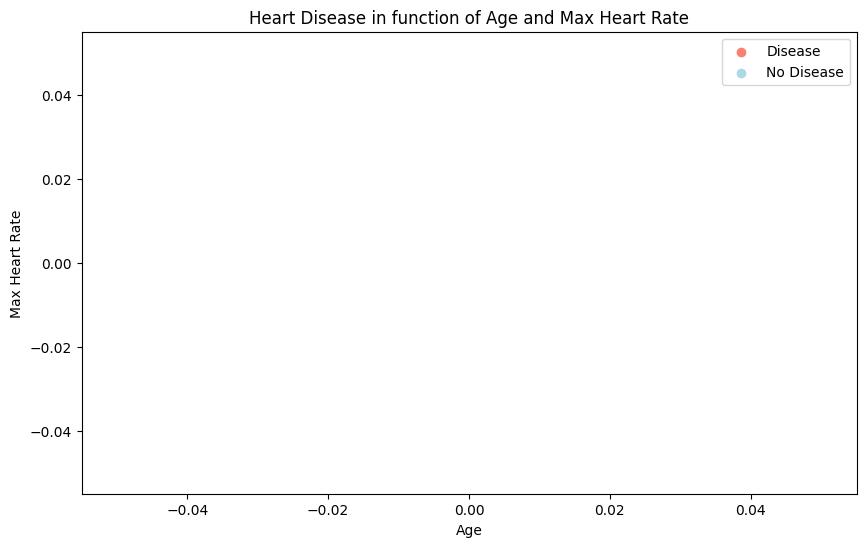

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(df.age[df.target==1],
            df.thalach[df.target==1],
            c="salmon")
plt.scatter(df.age[df.target==0],
            df.thalach[df.target==0],
            c="lightblue")

plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease", "No Disease"]);
plt.show();

<Axes: ylabel='Frequency'>

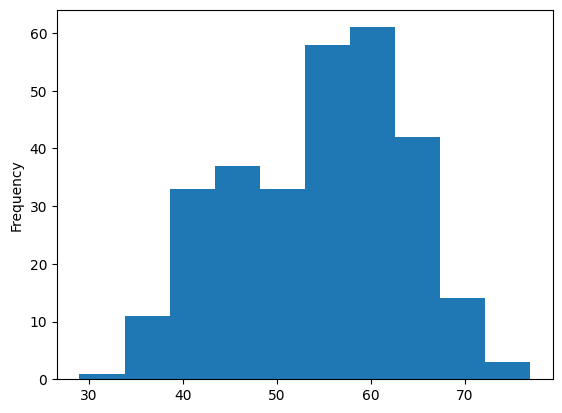

In [ ]:
df.age.plot.hist()

In [ ]:
pd.crosstab

<function pandas.core.reshape.pivot.crosstab(index, columns, values=None, rownames=None, colnames=None, aggfunc=None, margins: 'bool' = False, margins_name: 'str' = 'All', dropna: 'bool' = True, normalize=False) -> 'DataFrame'>

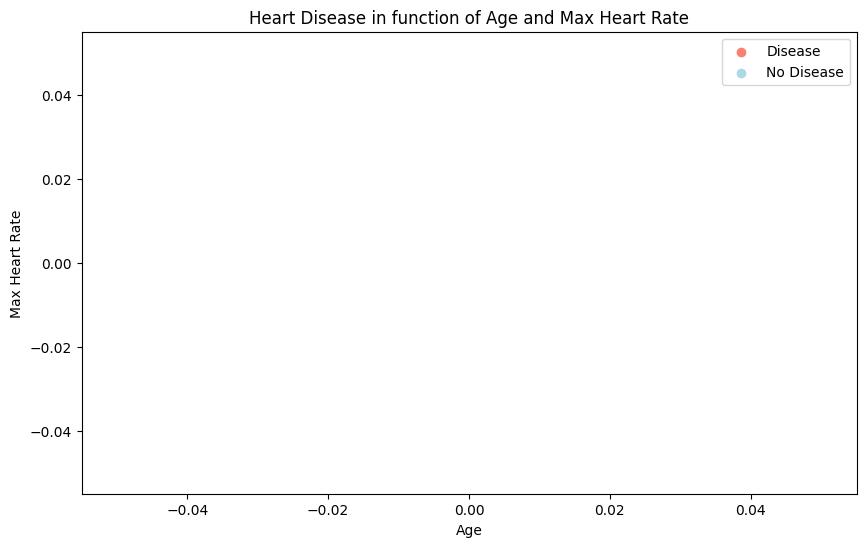

In [ ]:
# Created another figure here
plt.figure(figsize=(10, 6))

# Scatter with postivie examples
plt.scatter(df.age[df.target==1],
            df.thalach[df.target==1],
            c="salmon")

# Scatter with negative examples
plt.scatter(df.age[df.target==0],
            df.thalach[df.target==0],
            c="lightblue")

# Added helpful information
plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease", "No Disease"]);

In [ ]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,101,37
1,9,41
2,16,66
3,7,16


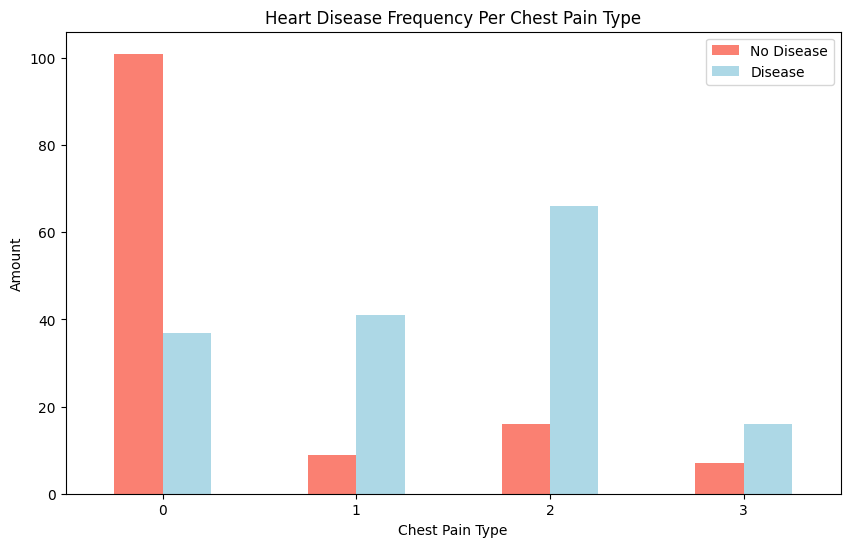

In [ ]:
pd.crosstab(df.cp, df.target).plot(kind="bar",
                                   figsize=(10, 6),
                                   color=["salmon", "lightblue"])

plt.title("Heart Disease Frequency Per Chest Pain Type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Amount")
plt.legend(["No Disease", "Disease"])
plt.xticks(rotation=0);

In [ ]:
df.head()

,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0,63,male,3,145.0,233.0,1,0,150.0,0,2.3,0,0,1,yes
1,1,37,male,2,130.0,250.0,0,1,187.0,0,3.5,0,0,2,yes
2,2,41,female,1,130.0,204.0,0,0,172.0,0,1.4,2,0,2,yes
3,3,56,male,1,120.0,236.0,0,1,178.0,0,0.8,2,0,2,yes
5,5,57,male,0,140.0,192.0,0,1,148.0,0,0.4,1,0,1,yes


In [ ]:
df.corr()

<ipython-input-100-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Unnamed: 0,age,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
Unnamed: 0,1.000000,0.179975,-0.398856,0.098182,0.051948,-0.008088,-0.019919,-0.391267,0.378961,0.307510,-0.274223,0.380823,0.264371
age,0.179975,1.000000,-0.070586,0.276586,0.216155,0.127349,-0.119509,-0.396884,0.095919,0.211278,-0.167542,0.280493,0.067060
cp,-0.398856,-0.070586,1.000000,0.051210,-0.091003,0.097889,0.045198,0.302782,-0.391609,-0.153591,0.122779,-0.182492,-0.171826
trestbps,0.098182,0.276586,0.051210,1.000000,0.135529,0.168406,-0.102731,-0.028102,0.072459,0.193254,-0.115657,0.096166,0.073411
chol,0.051948,0.216155,-0.091003,0.135529,1.000000,0.026193,-0.166307,-0.038738,0.071904,0.066434,-0.026953,0.089595,0.106809
fbs,-0.008088,0.127349,0.097889,0.168406,0.026193,1.000000,-0.078938,0.001339,0.036164,0.009607,-0.060520,0.118146,-0.012527
restecg,-0.019919,-0.119509,0.045198,-0.102731,-0.166307,-0.078938,1.000000,0.038211,-0.073327,-0.051767,0.087550,-0.069496,-0.018690
thalach,-0.391267,-0.396884,0.302782,-0.028102,-0.038738,0.001339,0.038211,1.000000,-0.395491,-0.347278,0.379258,-0.207472,-0.099342
exang,0.378961,0.095919,-0.391609,0.072459,0.071904,0.036164,-0.073327,-0.395491,1.000000,0.286938,-0.259066,0.121005,0.199949
oldpeak,0.307510,0.211278,-0.153591,0.193254,0.066434,0.009607,-0.051767,-0.347278,0.286938,1.000000,-0.572282,0.225590,0.206558


<ipython-input-101-d4892e15ddcb>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


(13.5, -0.5)

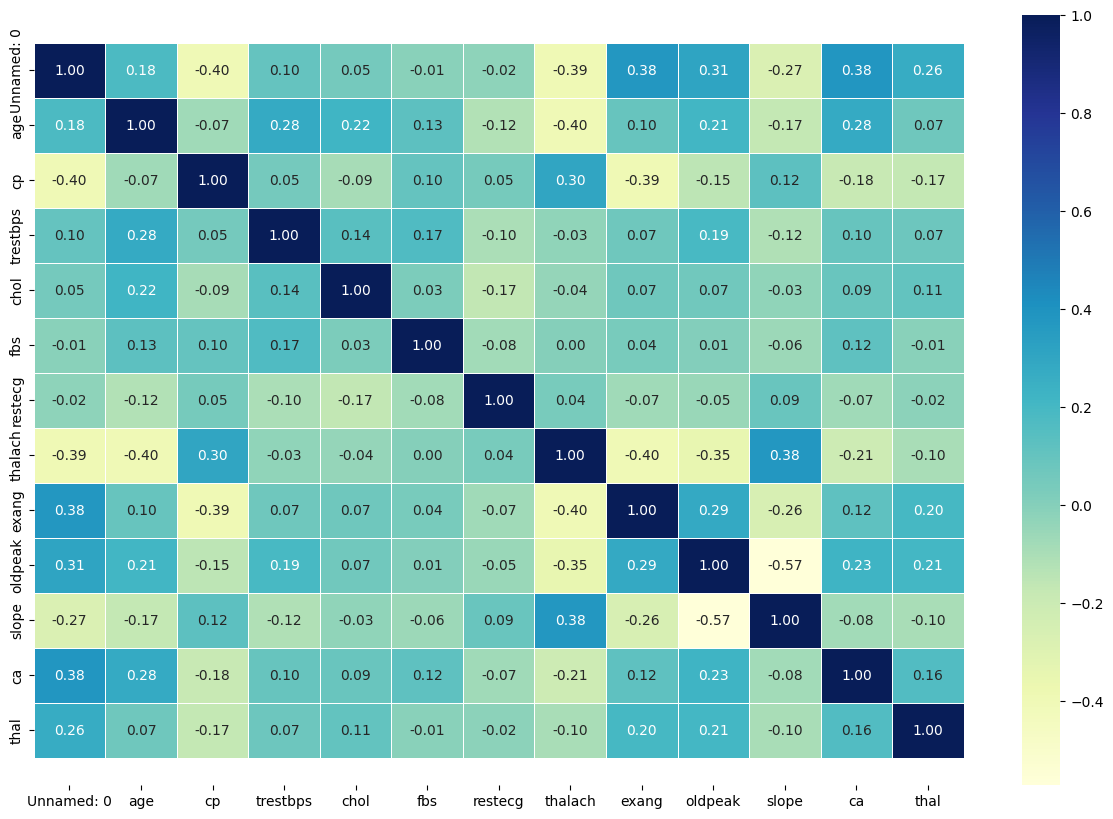

In [ ]:

import seaborn as sns
corr_matrix = df.corr()
fig, ax= plt.subplots(figsize = (15,10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths= 0.5,
                 fmt = ".2f",
                 cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top -0.5)

In [ ]:
df.head()

,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0,63,male,3,145.0,233.0,1,0,150.0,0,2.3,0,0,1,yes
1,1,37,male,2,130.0,250.0,0,1,187.0,0,3.5,0,0,2,yes
2,2,41,female,1,130.0,204.0,0,0,172.0,0,1.4,2,0,2,yes
3,3,56,male,1,120.0,236.0,0,1,178.0,0,0.8,2,0,2,yes
5,5,57,male,0,140.0,192.0,0,1,148.0,0,0.4,1,0,1,yes


In [ ]:
X= df.drop("target", axis= 1)

In [ ]:
y= df.target.values

In [ ]:
X.head()

,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0,63,male,3,145.0,233.0,1,0,150.0,0,2.3,0,0,1
1,1,37,male,2,130.0,250.0,0,1,187.0,0,3.5,0,0,2
2,2,41,female,1,130.0,204.0,0,0,172.0,0,1.4,2,0,2
3,3,56,male,1,120.0,236.0,0,1,178.0,0,0.8,2,0,2
5,5,57,male,0,140.0,192.0,0,1,148.0,0,0.4,1,0,1


In [ ]:
y

array(['yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes',
       'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes',
       'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes',
       'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes',
       'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes',
       'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes',
       'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes',
       'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes',
       'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes',
       'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes',
       'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes',
       'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes',
       'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes',
       'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes',
       'yes', 'yes',

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.2)

In [ ]:
X_train.head()

,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
217,217,63,male,0,130.0,330.0,1,0,132.0,1,1.8,2,3,3
236,236,58,male,0,125.0,300.0,0,0,171.0,0,0.0,2,2,3
233,233,64,male,0,120.0,246.0,0,0,96.0,1,2.2,0,1,2
76,76,51,male,2,125.0,245.0,1,0,166.0,0,2.4,1,0,2
27,27,51,male,2,110.0,175.0,0,1,123.0,0,0.6,2,0,2


In [ ]:
y_train, len(y_train)

(array(['no', 'no', 'no', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes',
        'yes', 'yes', 'yes', 'yes', 'yes', 'no', 'yes', 'yes', 'no', 'yes',
        'no', 'yes', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'yes', 'no',
        'yes', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'no', 'no', 'yes',
        'no', 'no', 'yes', 'yes', 'yes', 'yes', 'no', 'no', 'yes', 'no',
        'yes', 'no', 'no', 'no', 'no', 'yes', 'no', 'yes', 'no', 'no',
        'no', 'yes', 'no', 'yes', 'yes', 'yes', 'yes', 'no', 'no', 'no',
        'yes', 'no', 'no', 'yes', 'yes', 'yes', 'no', 'no', 'yes', 'yes',
        'yes', 'no', 'no', 'no', 'yes', 'no', 'yes', 'no', 'yes', 'yes',
        'yes', 'yes', 'no', 'no', 'yes', 'yes', 'yes', 'no', 'no', 'yes',
        'no', 'no', 'yes', 'yes', 'no', 'yes', 'no', 'yes', 'no', 'yes',
        'no', 'no', 'no', 'yes', 'yes', 'yes', 'yes', 'no', 'no', 'no',
        'yes', 'no', 'no', 'yes', 'no', 'yes', 'yes', 'yes', 'no', 'no',
        'no', 'no', 'yes', 'yes', 'yes', 'yes

In [ ]:
X_test.head()

,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
87,87,46,male,1,101.0,197.0,1,1,156.0,0,0.0,2,0,3
268,268,54,male,0,122.0,286.0,0,0,116.0,1,3.2,1,2,2
47,47,47,male,2,138.0,257.0,0,0,156.0,0,0.0,2,0,2
182,182,61,female,0,130.0,330.0,0,0,169.0,0,0.0,2,0,2
148,148,44,male,2,120.0,226.0,0,1,169.0,0,0.0,2,0,2


In [ ]:
y_test, len(y_test)

(array(['yes', 'no', 'yes', 'no', 'yes', 'yes', 'no', 'yes', 'yes', 'yes',
        'yes', 'no', 'yes', 'no', 'no', 'yes', 'yes', 'yes', 'no', 'no',
        'yes', 'no', 'no', 'yes', 'yes', 'no', 'no', 'yes', 'yes', 'no',
        'yes', 'yes', 'no', 'yes', 'yes', 'no', 'no', 'yes', 'yes', 'yes',
        'yes', 'yes', 'no', 'yes', 'no', 'yes', 'yes', 'yes', 'no', 'yes',
        'no', 'yes', 'yes', 'no', 'no', 'no', 'no', 'no', 'yes'],
       dtype=object),
 59)

In [ ]:
from sklearn.linear_model import LogisticRegression
models  = {"Logistic Regression" : LogisticRegression()}

def fit_and_score(models, X_train, X_test, y_train, y_test):
  np.random.seed(42)
  model_scores = {}

  for name, model in models.items():
    model.fit(X_train, y_train)
    model_scores[name] = model.score(X_test, y_test)
  return model_scores

In [ ]:
from sklearn.preprocessing import LabelEncoder

#create instance of label encoder
lab = LabelEncoder()

#perform label encoding on 'team' column
df['sex'] = lab.fit_transform(df['sex'])
df['target'] = lab.fit_transform(df['target'])


In [ ]:
one_hot_encoded_data = pd.get_dummies(df, columns = ['sex'])
print(one_hot_encoded_data)

     Unnamed: 0  age  cp  trestbps   chol  fbs  restecg  thalach  exang  \
0             0   63   3     145.0  233.0    1        0    150.0      0   
1             1   37   2     130.0  250.0    0        1    187.0      0   
2             2   41   1     130.0  204.0    0        0    172.0      0   
3             3   56   1     120.0  236.0    0        1    178.0      0   
5             5   57   0     140.0  192.0    0        1    148.0      0   
..          ...  ...  ..       ...    ...  ...      ...      ...    ...   
296         296   63   0     124.0  197.0    0        1    136.0      1   
298         298   57   0     140.0  241.0    0        1    123.0      1   
299         299   45   3     110.0  264.0    0        1    132.0      0   
300         300   68   0     144.0  193.0    1        1    141.0      0   
302         302   57   1     130.0  236.0    0        0    174.0      0   

     oldpeak  slope  ca  thal  target  sex_0  sex_1  
0        2.3      0   0     1       1      0 

In [ ]:
df.head()

,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0,63,1,3,145.0,233.0,1,0,150.0,0,2.3,0,0,1,1
1,1,37,1,2,130.0,250.0,0,1,187.0,0,3.5,0,0,2,1
2,2,41,0,1,130.0,204.0,0,0,172.0,0,1.4,2,0,2,1
3,3,56,1,1,120.0,236.0,0,1,178.0,0,0.8,2,0,2,1
5,5,57,1,0,140.0,192.0,0,1,148.0,0,0.4,1,0,1,1


In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score

In [ ]:
from sklearn.preprocessing import LabelEncoder

#create instance of label encoder
lab = LabelEncoder()

#perform label encoding on 'team' column
df['target'] = lab.fit_transform(df['target'])

In [ ]:
df['sex'] = df['sex'].astype(int)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 293 entries, 0 to 302
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  293 non-null    int64  
 1   age         293 non-null    int64  
 2   sex         293 non-null    int64  
 3   cp          293 non-null    int64  
 4   trestbps    293 non-null    float64
 5   chol        293 non-null    float64
 6   fbs         293 non-null    int64  
 7   restecg     293 non-null    int64  
 8   thalach     293 non-null    float64
 9   exang       293 non-null    int64  
 10  oldpeak     293 non-null    float64
 11  slope       293 non-null    int64  
 12  ca          293 non-null    int64  
 13  thal        293 non-null    int64  
 14  target      293 non-null    int64  
dtypes: float64(4), int64(11)
memory usage: 36.6 KB


In [ ]:
df['target'] = df['target'].astype(int)

In [ ]:
df.head()

,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0,63,1,3,145.0,233.0,1,0,150.0,0,2.3,0,0,1,1
1,1,37,1,2,130.0,250.0,0,1,187.0,0,3.5,0,0,2,1
2,2,41,0,1,130.0,204.0,0,0,172.0,0,1.4,2,0,2,1
3,3,56,1,1,120.0,236.0,0,1,178.0,0,0.8,2,0,2,1
5,5,57,1,0,140.0,192.0,0,1,148.0,0,0.4,1,0,1,1


In [ ]:
X = df.iloc[:,:14]
Y = df.iloc[:,-1]

In [ ]:
X.head()

,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0,63,1,3,145.0,233.0,1,0,150.0,0,2.3,0,0,1
1,1,37,1,2,130.0,250.0,0,1,187.0,0,3.5,0,0,2
2,2,41,0,1,130.0,204.0,0,0,172.0,0,1.4,2,0,2
3,3,56,1,1,120.0,236.0,0,1,178.0,0,0.8,2,0,2
5,5,57,1,0,140.0,192.0,0,1,148.0,0,0.4,1,0,1


In [ ]:
df.head()

,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0,63,1,3,145.0,233.0,1,0,150.0,0,2.3,0,0,1,1
1,1,37,1,2,130.0,250.0,0,1,187.0,0,3.5,0,0,2,1
2,2,41,0,1,130.0,204.0,0,0,172.0,0,1.4,2,0,2,1
3,3,56,1,1,120.0,236.0,0,1,178.0,0,0.8,2,0,2,1
5,5,57,1,0,140.0,192.0,0,1,148.0,0,0.4,1,0,1,1


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.2)

In [ ]:
from sklearn.linear_model import LogisticRegression
models  = {"Logistic Regression" : LogisticRegression()}

def fit_and_score(models, X_train, X_test, y_train, y_test):
  np.random.seed(42)
  model_scores = {}

  for name, model in models.items():
    model.fit(X_train, y_train)
    model_scores[name] = model.score(X_test, y_test)
  return model_scores

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 293 entries, 0 to 302
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  293 non-null    int64  
 1   age         293 non-null    int64  
 2   sex         293 non-null    int64  
 3   cp          293 non-null    int64  
 4   trestbps    293 non-null    float64
 5   chol        293 non-null    float64
 6   fbs         293 non-null    int64  
 7   restecg     293 non-null    int64  
 8   thalach     293 non-null    float64
 9   exang       293 non-null    int64  
 10  oldpeak     293 non-null    float64
 11  slope       293 non-null    int64  
 12  ca          293 non-null    int64  
 13  thal        293 non-null    int64  
 14  target      293 non-null    int64  
dtypes: float64(4), int64(11)
memory usage: 36.6 KB


In [ ]:
from sklearn.model_selection import train_test_split
model_scores = fit_and_score(models = models,
                    X_train=X_train,
                    X_test=X_test,
                    y_train=y_train,
                    y_test=y_test)
model_scores

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 1.0}